In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/who.csv')

In [3]:
df.head()

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

Question 1. We need to know what's included in this data.

How many countries are present?

What's the timespan of the data?

Does each country have a row for every year present?

Which countries are missing years?

How many rows have at least 1 non-null values across the columns 3-57?

In [5]:
print("Total Countries:",len(pd.unique(df['country'])))

Total Countries: 219


In [6]:
df['year'].max()-df['year'].min()

33

In [15]:
f=df.groupby('country').count()
f['year'].min()

3

- No, each country do not have a row for every year present.

In [34]:
table = pd.pivot_table(df, values= 'country' index =['country', 'year'], columns =['year'])
table

new_ep_f014  new_ep_f1524  new_ep_f2534  new_ep_f3544  \
country     year                                                          
Afghanistan 1997          NaN           NaN           NaN           NaN   
            1998          NaN           NaN           NaN           NaN   
            1999          NaN           NaN           NaN           NaN   
            2000          NaN           NaN           NaN           NaN   
            2001          NaN           NaN           NaN           NaN   
...                       ...           ...           ...           ...   
Zimbabwe    2009        210.0         394.0           0.0        1944.0   
            2010        220.0         319.0        1058.0         677.0   
            2011        209.0         318.0         802.0         640.0   
            2012        208.0         319.0         710.0         579.0   
            2013          NaN           NaN           NaN           NaN   

                  new_ep_f4554  new_ep_f5564  new_ep_f65  new_ep_m014  \
country     year                                                        
Afghanistan 1997           NaN           NaN         NaN          NaN   
            1998           NaN           NaN         NaN          NaN   
            1999           NaN           NaN         NaN          NaN   
            2000           NaN           NaN         NaN          NaN   
            2001           NaN           NaN         NaN          NaN   
...                        ...           ...         ...          ...   
Zimbabwe    2009         438.0         182.0       138.0        244.0   
            2010         338.0         181.0       146.0        270.0   
            2011         284.0         137.0       129.0        250.0   
            2012         228.0         140.0       143.0        233.0   
            2013           NaN           NaN         NaN          NaN   

                  new_ep_m1524  new_ep_m2534  ...  newrel_f4554  newrel_f5564  \
country     year                              ...                               
Afghanistan 1997           NaN           NaN  ...           NaN           NaN   
            1998           NaN           NaN  ...           NaN           NaN   
            1999           NaN           NaN  ...           NaN           NaN   
            2000           NaN           NaN  ...           NaN           NaN   
            2001           NaN           NaN  ...           NaN           NaN   
...                        ...           ...  ...           ...           ...   
Zimbabwe    2009         266.0           0.0  ...           NaN           NaN   
            2010         243.0         902.0  ...           NaN           NaN   
            2011         195.0         746.0  ...           NaN           NaN   
            2012         214.0         658.0  ...           NaN           NaN   
            2013           NaN           NaN  ...        1453.0         811.0   

                  newrel_f65  newrel_m014  newrel_m1524  newrel_m2534  \
country     year                                                        
Afghanistan 1997         NaN          NaN           NaN           NaN   
            1998         NaN          NaN           NaN           NaN   
            1999         NaN          NaN           NaN           NaN   
            2000         NaN          NaN           NaN           NaN   
            2001         NaN          NaN           NaN           NaN   
...                      ...          ...           ...           ...   
Zimbabwe    2009         NaN          NaN           NaN           NaN   
            2010         NaN          NaN           NaN           NaN   
            2011         NaN          NaN           NaN           NaN   
            2012         NaN          NaN           NaN           NaN   
            2013       725.0       1315.0        1642.0        5331.0   

                  newrel_m3544  newrel_m4554  newrel_m5564  newrel_m65  
country     yea

In [33]:
print(df.notnull())

      country  year  new_sp_m014  new_sp_m1524  new_sp_m2534  new_sp_m3544  \
0        True  True        False         False         False         False   
1        True  True        False         False         False         False   
2        True  True        False         False         False         False   
3        True  True        False         False         False         False   
4        True  True        False         False         False         False   
...       ...   ...          ...           ...           ...           ...   
7235     True  True         True          True         False          True   
7236     True  True         True          True          True          True   
7237     True  True         True          True          True          True   
7238     True  True         True          True          True          True   
7239     True  True        False         False         False         False   

      new_sp_m4554  new_sp_m5564  new_sp_m65  new_sp_f014  ... 

Question 2: Wide data isn't usually helpful.

Convert this to a long format with the following columns:

country

year

diagnosis method: mapping should be:

{'newsp':'Pulmonary Smear (+)'

,'newsn':'Pulmonary Smear (-)'

,'newep':'Extrapulmonary'

,'newrel':'Relapse'}   

gender: male or female.

age: lower_age - higher_age, e.g., 0-14

number of cases

In [ ]:
df.replace()

Question 3: Create a graph that shows when countries started to report TB cases.

In [8]:
f=df.groupby('country').year.agg(['min'])
f

,min
country,
Afghanistan,1980
Albania,1980
Algeria,1980
American Samoa,1980
Andorra,1980
...,...
Wallis and Futuna Islands,1980
West Bank and Gaza Strip,1980
Yemen,1980


In [15]:
f = f.reset_index()
f

,index,country,min
0,0,Afghanistan,1980
1,1,Albania,1980
2,2,Algeria,1980
3,3,American Samoa,1980
4,4,Andorra,1980
...,...,...,...
214,214,Wallis and Futuna Islands,1980
215,215,West Bank and Gaza Strip,1980
216,216,Yemen,1980
217,217,Zambia,1980


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


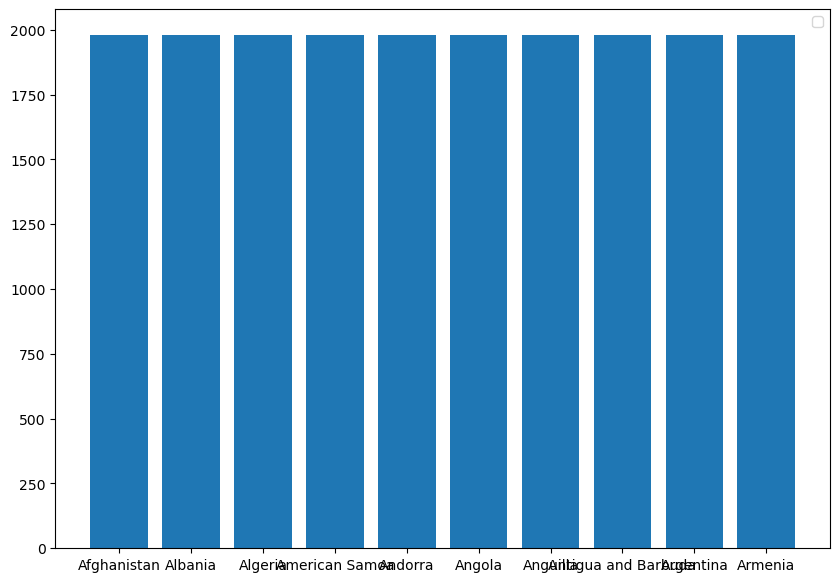

In [24]:
country = f['country'].head(20)
year = f['min'].head(20)

fig = plt.figure(figsize =(10, 7))
 
plt.bar(country[0:10], year[0:10])

plt.legend()